<a href="https://colab.research.google.com/github/yagnik99/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Yagnik_Pandya_Team_2_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Capstone Project 3/'

In [ ]:
bike_data = pd.read_csv(folder + 'SeoulBikeData.csv', engine='python')

In [ ]:
bike_data.head(3)

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Rename columns
bike_data.rename(columns={'Rented Bike Count':'Rented_Bike_Count', 'Temperature(�C)' : 'Temp_C', 'Humidity(%)' : 'Humidity_Percentage', 'Wind speed (m/s)':'Wind_speed', 'Visibility (10m)': 'Visibility', 'Dew point temperature(�C)': 'Dew_point_Temp', 'Solar Radiation (MJ/m2)':'Solar_Radiation', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)': 'Snowfall', 'Functioning Day':'Functioning_Day'}, inplace=True)

In [ ]:
import datetime

In [ ]:
# Duration of Data
pd.DatetimeIndex(bike_data['Date']).max() - pd.DatetimeIndex(bike_data['Date']).min()

Timedelta('698 days 00:00:00')

###Checking for any incorrect data.

In [ ]:
len(bike_data[(bike_data['Functioning_Day'] == 'No') & (bike_data['Rented_Bike_Count'] != 0)])

0

In [ ]:
len(bike_data[bike_data['Rented_Bike_Count'] < 0])

0

In [ ]:
len(bike_data[(bike_data['Functioning_Day'] == 'No') & (bike_data['Rented_Bike_Count'] == 0)])

295

In [ ]:
bike_data = bike_data[bike_data['Functioning_Day'] == 'Yes']

In [ ]:
bike_data.drop('Functioning_Day', axis = 1, inplace =True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


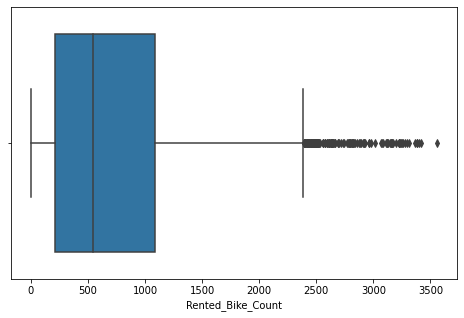

In [ ]:
# Outliers
sns.boxplot(bike_data['Rented_Bike_Count'])

###Exploring catagorical variables.

In [ ]:
bike_data['Seasons']

Text(0, 0.5, 'Counts')

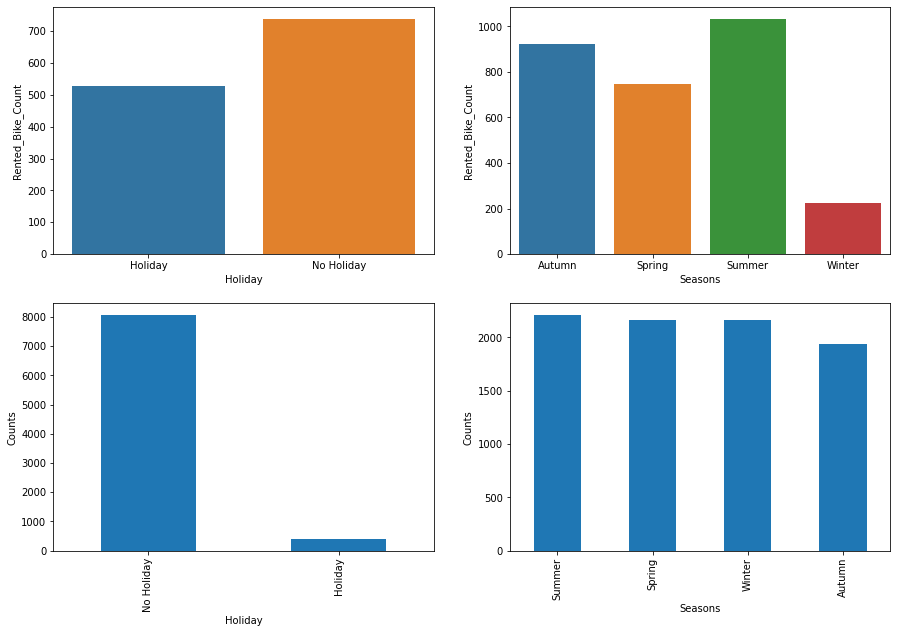

In [ ]:
Holiday_rent = pd.DataFrame(bike_data.groupby('Holiday').agg({'Rented_Bike_Count':'mean'}))
Season_rent = pd.DataFrame(bike_data.groupby('Seasons').agg({'Rented_Bike_Count':'mean'}))

# Bike rents in Seasons and holidays
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Holiday_rent.index, y = Holiday_rent['Rented_Bike_Count'])
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Season_rent.index, y = Season_rent['Rented_Bike_Count'])

# How many Total Seasons and Holidays
ax1=plt.subplot(2, 2,3)
bike_data['Holiday'].value_counts().plot(kind='bar')
plt.xlabel('Holiday')
plt.ylabel('Counts')
ax1=plt.subplot(2, 2,4)
bike_data['Seasons'].value_counts().plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('Counts')

###Exploring numerical variables

In [ ]:
numerical_features = ['Hour', 'Temp_C', 'Humidity_Percentage',
       'Wind_speed', 'Visibility', 'Dew_point_Temp', 'Solar_Radiation',
       'Rainfall', 'Snowfall']

In [ ]:
# List of colors in the color palettes
rgb_values = sns.color_palette("Set1", 9)

In [ ]:
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

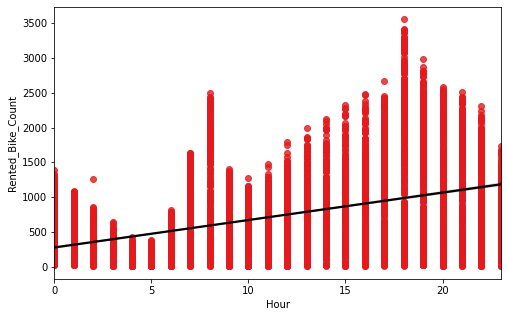

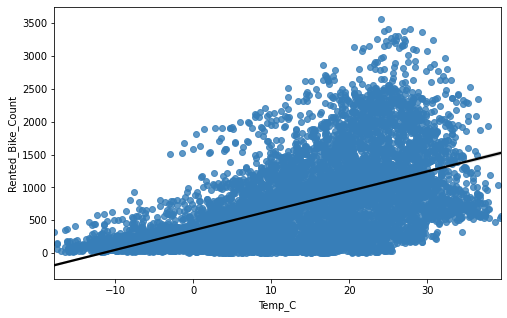

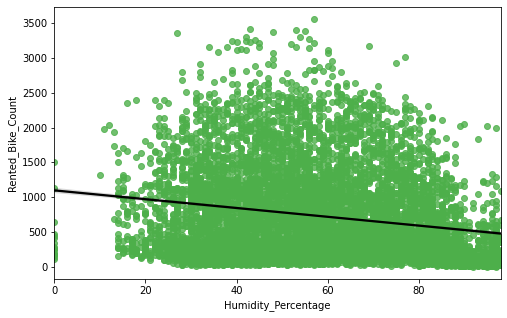

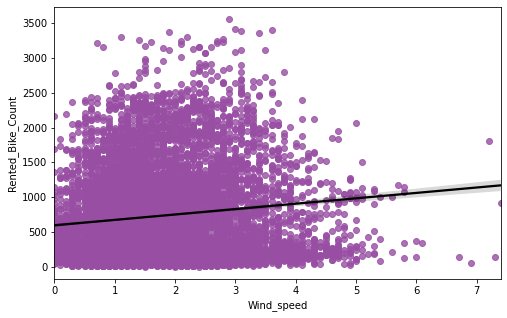

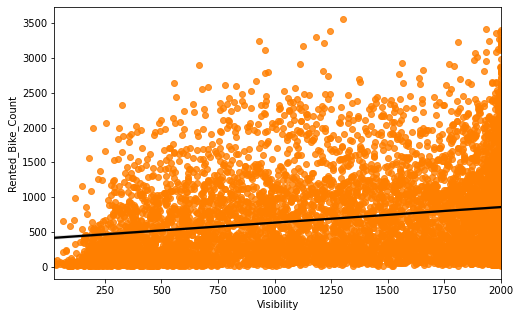

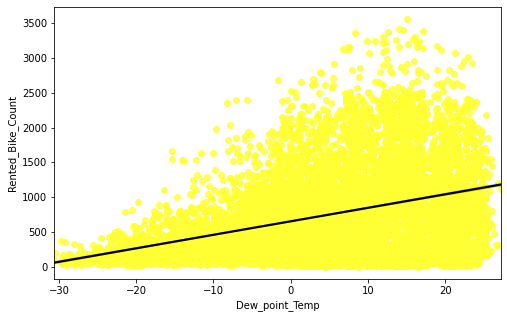

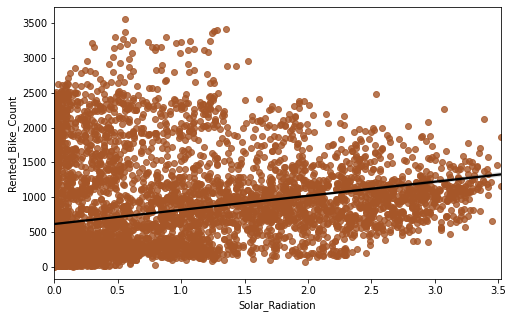

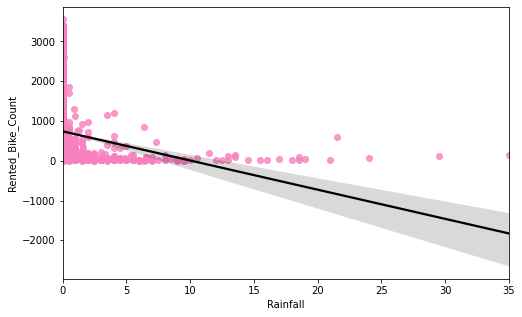

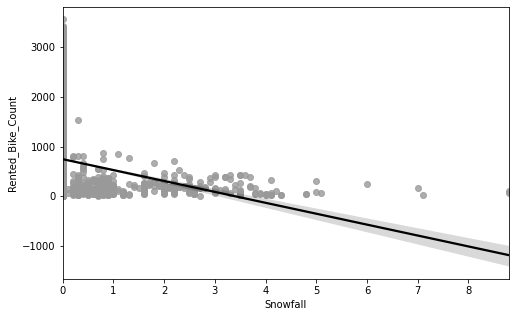

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_data[col], y = bike_data['Rented_Bike_Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "black"})

###**Distribution**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


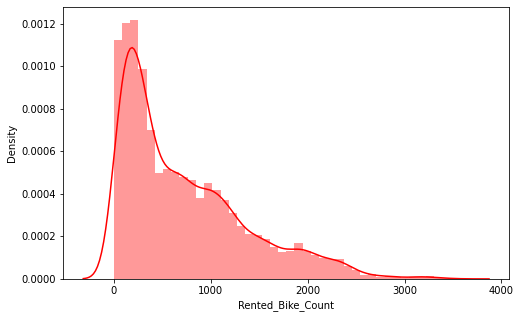

In [ ]:
sns.distplot(bike_data['Rented_Bike_Count'], color='r')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

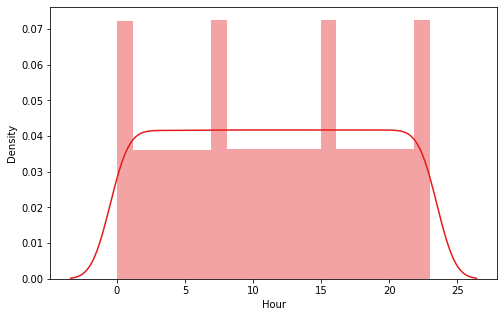

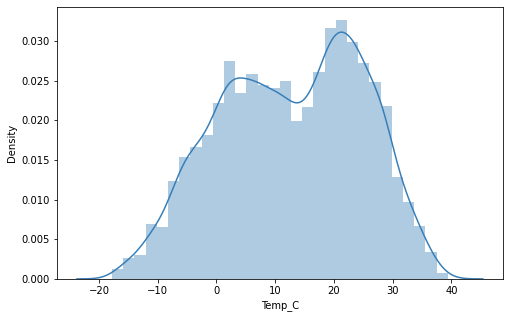

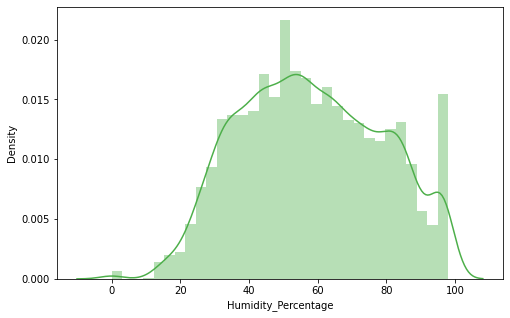

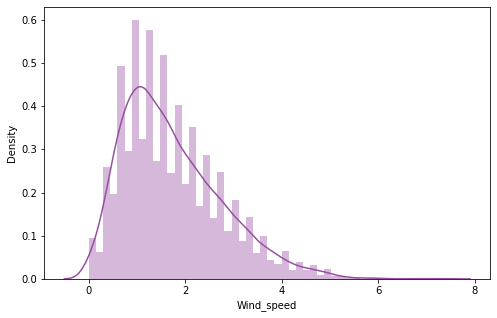

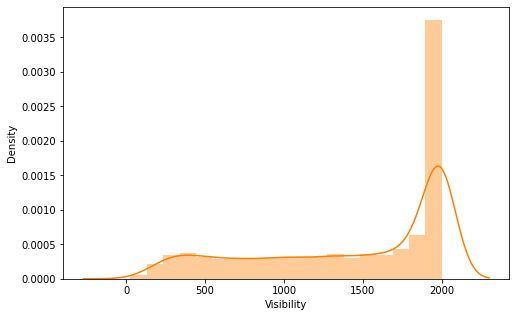

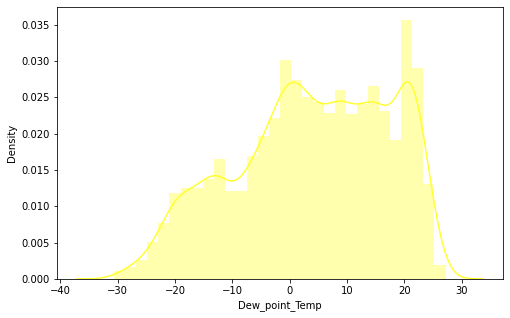

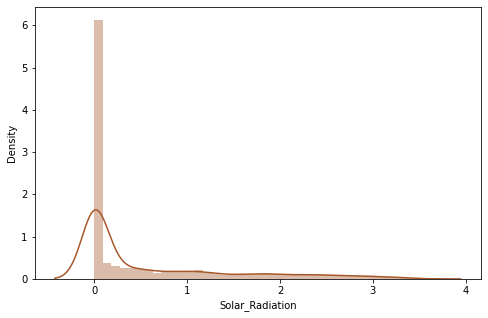

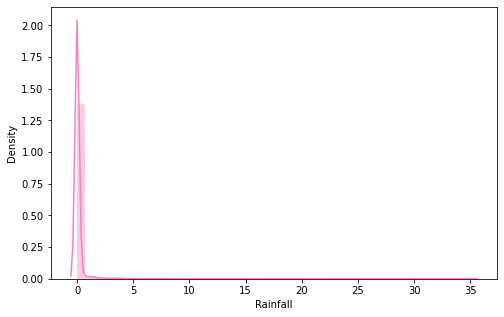

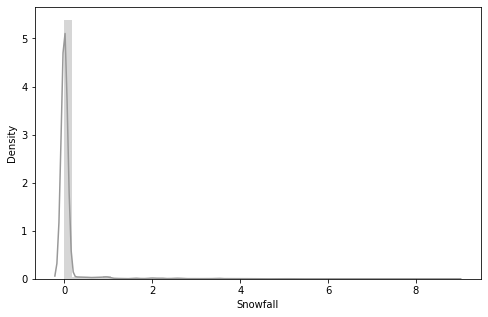

In [ ]:
# Distributions
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.distplot(bike_data[col], color= color_map[key])

###**Change in Bike Renting with Change in hours**

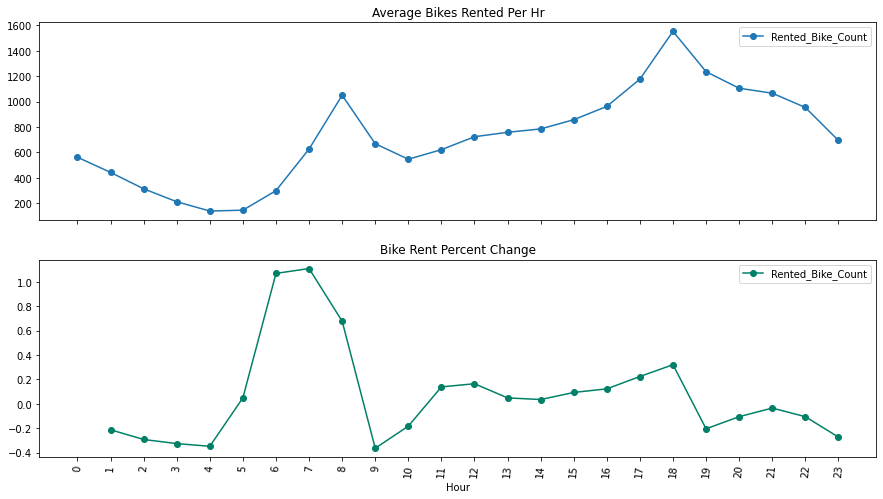

In [ ]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].mean()
pct_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_hrs.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")
#ax1.set_xticks(range(len(avg_rent_hrs)))


###Feature Eng.

In [ ]:
# One hot encoding
bike_data = pd.get_dummies(bike_data, columns=['Seasons'], prefix=['Seasons'])

In [ ]:
# Create dummy variables for the catgeorical variable 
bike_data['Holiday'] = np.where(bike_data['Holiday']=='Holiday', 1, 0)

In [ ]:
bike_data.head(3)

,Date,Rented_Bike_Count,Hour,Temp_C,Humidity_Percentage,Wind_speed,Visibility,Dew_point_Temp,Solar_Radiation,Rainfall,Snowfall,Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1


In [ ]:
bike_data['Date'][0][3:]

'12/2017'

In [ ]:
bike_data['Date_temp'] = bike_data['Date'].apply(lambda x: (str(x)[3:]))

In [ ]:
bike_data.head(3)

,Date,Rented_Bike_Count,Hour,Temp_C,Humidity_Percentage,Wind_speed,Visibility,Dew_point_Temp,Solar_Radiation,Rainfall,Snowfall,Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Date_temp
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,12/2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,12/2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1,12/2017


Date_temp
01/2018     201.620968
02/2018     225.941964
03/2018     511.551075
04/2018     753.199713
05/2018     982.066667
06/2018    1245.676389
07/2018     987.177419
08/2018     876.192204
09/2018    1079.506410
10/2018     978.458647
11/2018     718.695988
12/2017     249.099462
Name: Rented_Bike_Count, dtype: float64


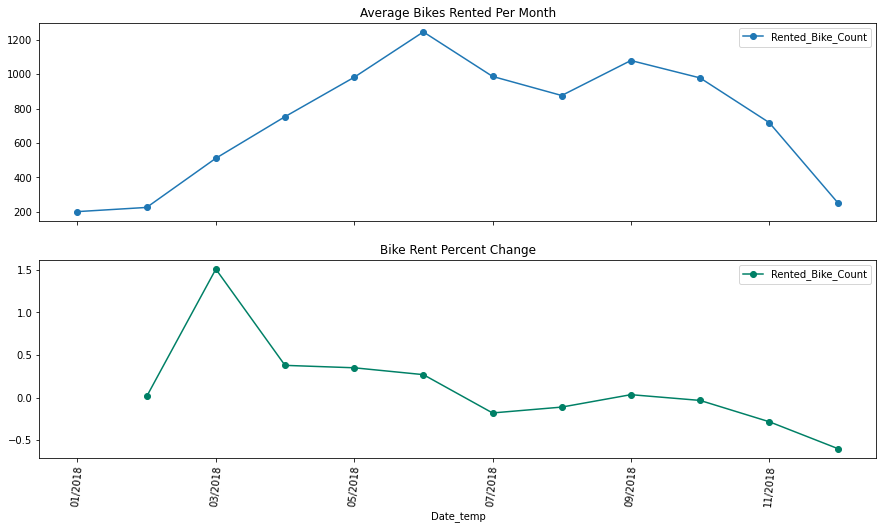

In [ ]:
# group by Date(months) and get average Bikes rented
avg_rent_months = bike_data.groupby('Date_temp')['Rented_Bike_Count'].mean()
pct_rent_months = bike_data.groupby('Date_temp')['Rented_Bike_Count'].sum().pct_change()
print(avg_rent_months)

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over months
avg_rent_months.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Month")
ax1.set_xticks(range(len(avg_rent_months)))
ax1.set_xticklabels(avg_rent_months.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_months.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")